# Interest Rates and Yield Curve Interpolation

Steps:  
- Get interest rates data from web site  
- Apply interpolation method  
- Testing output with input data

In [3]:
# Inputs
goto_website = 'https://www.federalreserve.gov/datadownload/Download.aspx?rel=H15&series=bf17364827e38702b42a58cf8eaa3f78&from=&to=&lastObs=&filetype=csv&label=include&layout=seriescolumn&type=package'
driver_executable_path = "C:\\Users\\srobi\\GitHubRepos\\chromedriver.exe"
download_directory = "C:\\Users\\srobi\\GitHubRepos\\0_inputs\\economic_indicators\\interest_rates"

![View](Images/int_rates1.png)

In [10]:
# Random wait times
import random
import time

def waitTime(myfloat: float):
    
    if isinstance(myfloat,int):
        myfloat = float(myfloat)
        
    if isinstance(myfloat,float):
        quick_time = random.randint(0,9)*10**(-1) + random.randint(0,9)*10**(-2) + random.randint(0,9)*10**(-3) + random.randint(0,9)*10**(-4) + random.randint(0,9)*10**(-5) + random.randint(0,9)*10**(-6)
        quick_time = quick_time + myfloat
        print(f'Input = {myfloat}, Sleep time: {quick_time:.3f} seconds')
        time.sleep(quick_time)
    else:
        return 'Input a float value.'

In [8]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

op = webdriver.ChromeOptions()
p = {"download.default_directory":download_directory,"safebrowsing.enabled":"false"}
op.add_experimental_option("prefs", p)

browser = webdriver.Chrome(executable_path=driver_executable_path, options=op)
browser.implicitly_wait(0.4)

browser.get(goto_website)
waitTime(3)

In [7]:
# browser.quit()

In [9]:
click_item = WebDriverWait(browser, 20).until(EC.presence_of_element_located((By.XPATH,"//html/body/form/div[3]/div[5]/div[2]/div/p[2]/a[1]")))
browser.execute_script("arguments[0].click()",click_item)
waitTime(3)

In [11]:
browser.quit()

In [49]:
import pandas as pd
from collections import defaultdict

int_rate_df = pd.read_csv('../0_inputs/economic_indicators/interest_rates/FRB_H15.csv')

int_rate_list = ['1-month','3-month','6-month','1-year','2-year','3-year','5-year','7-year','10-year','20-year','30-year']

col_name_dict = {'Series Description':'Date'}
problems_dict = defaultdict(list)
cur_rate_dict = defaultdict(list)
last_item_index = len(int_rate_df)-1

for col in int_rate_df.columns:
    if '1-month' in col:
        col_name_dict[col]='1-month'
        int_rate_list.remove('1-month')
        cur_rate_dict['term'].append('1-month')
        cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]))
        cur_rate_dict['days'].append(30)
    elif '3-month' in col: col_name_dict[col]='3-month'; int_rate_list.remove('3-month');cur_rate_dict['term'].append('3-month');cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]));cur_rate_dict['days'].append(3*30)
    elif '6-month' in col: col_name_dict[col]='6-month'; int_rate_list.remove('6-month');cur_rate_dict['term'].append('6-month');cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]));cur_rate_dict['days'].append(6*30)
    elif '1-year' in col: col_name_dict[col]='1-year'; int_rate_list.remove('1-year');cur_rate_dict['term'].append('1-year');cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]));cur_rate_dict['days'].append(12*30)
    elif '2-year' in col: col_name_dict[col]='2-year'; int_rate_list.remove('2-year');cur_rate_dict['term'].append('2-year');cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]));cur_rate_dict['days'].append(2*12*30)
    elif '3-year' in col: col_name_dict[col]='3-year'; int_rate_list.remove('3-year');cur_rate_dict['term'].append('3-year');cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]));cur_rate_dict['days'].append(3*12*30)
    elif '5-year' in col: col_name_dict[col]='5-year'; int_rate_list.remove('5-year');cur_rate_dict['term'].append('5-year');cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]));cur_rate_dict['days'].append(5*12*30)
    elif '7-year' in col: col_name_dict[col]='7-year'; int_rate_list.remove('7-year');cur_rate_dict['term'].append('7-year');cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]));cur_rate_dict['days'].append(7*12*30)
    elif '10-year' in col: col_name_dict[col]='10-year'; int_rate_list.remove('10-year');cur_rate_dict['term'].append('10-year');cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]));cur_rate_dict['days'].append(10*12*30)
    elif '20-year' in col: col_name_dict[col]='20-year'; int_rate_list.remove('20-year');cur_rate_dict['term'].append('20-year');cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]));cur_rate_dict['days'].append(20*12*30)
    elif '30-year' in col: col_name_dict[col]='30-year'; int_rate_list.remove('30-year');cur_rate_dict['term'].append('30-year');cur_rate_dict['value'].append(float(int_rate_df[col][last_item_index]));cur_rate_dict['days'].append(30*12*30)
        
if int_rate_list:
    problems_dict['message'].append(f'int_rate_list is not null!! = {int_rate_list}')
    
int_rate_df.rename(columns=col_name_dict,inplace=True)
int_rate_df.set_index('Date',inplace=True)
display(int_rate_df.tail(3))

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
Date,,,,,,,,,,,
2022-09-27,2.71,3.35,3.91,4.16,4.30,4.39,4.21,4.14,3.97,4.15,3.87
2022-09-28,2.63,3.40,3.87,3.99,4.07,4.12,3.92,3.83,3.72,3.98,3.70
2022-09-29,2.78,3.36,3.87,3.98,4.16,4.19,3.98,3.89,3.76,4.00,3.71


In [51]:
cur_rate_df = pd.DataFrame(cur_rate_dict)
cur_rate_df

,term,value,days
0,1-month,2.78,30
1,3-month,3.36,90
2,6-month,3.87,180
3,1-year,3.98,360
4,2-year,4.16,720
5,3-year,4.19,1080
6,5-year,3.98,1800
7,7-year,3.89,2520
8,10-year,3.76,3600
9,20-year,4.00,7200


In [54]:
# !pip install gekko

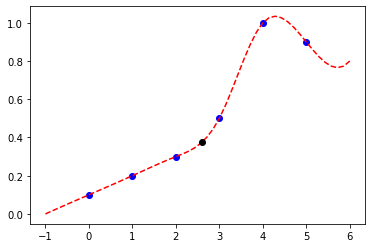

In [71]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig.patch.set_facecolor('white')

xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,1,0.9])

m = GEKKO(remote=True)
m.x = m.Param(value=np.linspace(-1,6))
m.y = m.Var()
m.cspline(m.x,m.y,xm,ym)
m.options.IMODE=2
m.solve(disp=False)

p = GEKKO(remote=True)
p.x = p.Var(value=1,lb=2.5,ub=2.6) # set lower bounds and upper bounds
p.y = p.Var()
# optimize this value change value to -p.y to find maximum, or +p.y to find minimum
p.Obj(-p.y)
p.cspline(p.x, p.y, xm, ym)
p.solve(disp=False)

plt.plot(xm,ym,'bo',label='data')
plt.plot(m.x,m.y,'r--',label='cubic spline')
plt.plot(p.x,p.y,'ko',label='maximum')

In [73]:
p.y

[0.37526124933]

#### Problems section

In [26]:
if problems_dict: problems_df = pd.DataFrame(problems_dict); display(problems_df)
else: print('There were no problems in this run.')

There were no problems in this run.


In [ ]:
print(f'Completed on {datetime.datetime.now()}')